In [109]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

vgs = pd.read_csv(r'C:\Users\Laurence Santos\vgsales.csv')
pd.set_option('display.max_rows', None)
videoGameSales = vgs.head(500)
videoGameSales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [110]:
videoGameSales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,500.000000,496.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,2005.092742,3.014580,1.916060,0.820980,0.600800,6.352300
std,144.481833,7.260761,3.415832,2.061512,1.321768,0.841739,6.146037
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,2.890000
25%,125.750000,2001.000000,1.540000,0.990000,0.040000,0.220000,3.500000
50%,250.500000,2007.000000,2.160000,1.405000,0.160000,0.410000,4.390000
75%,375.250000,2010.000000,3.242500,2.175000,1.035000,0.702500,6.590000
max,500.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [111]:
yearPublished = videoGameSales['Year']
yearPublished.loc[179] = 2003
yearPublished.loc[377] = 2003
yearPublished.loc[431] = 2008
yearPublished.loc[470] = 2005

gamePublisher = videoGameSales['Publisher']
gamePublisher.loc[470] = 'THQ'

C:\Users\Laurence Santos\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Laurence Santos\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Laurence Santos\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from 

In [112]:
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(videoGameSales['Platform'])
encoded_data = labelEncoder.transform(videoGameSales['Platform'])
videoGameSales['Platform'] = encoded_data

labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(videoGameSales['Genre'])
encoded_data = labelEncoder.transform(videoGameSales['Genre'])
videoGameSales['Genre'] = encoded_data

labelEncoder = preprocessing.LabelEncoder()
videoGameSales['Publisher'] = labelEncoder.fit_transform(videoGameSales['Publisher'].astype(str))
labelEncoder.fit(videoGameSales['Publisher'])
encoded_data = labelEncoder.transform(videoGameSales['Publisher'])
videoGameSales['Publisher'] = encoded_data

videoGameSales

C:\Users\Laurence Santos\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Laurence Santos\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Laurence Santos\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,16,2006.0,10,18,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,8,1985.0,4,18,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,16,2008.0,6,18,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,16,2009.0,10,18,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,3,1996.0,7,18,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,3,1989.0,5,18,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,2,2006.0,4,18,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,16,2006.0,3,18,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,16,2009.0,4,18,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,8,1984.0,8,18,26.93,0.63,0.28,0.47,28.31


In [113]:
x = videoGameSales[['Platform', 'Year', 'Genre', 'Publisher']]
y = videoGameSales['NA_Sales']

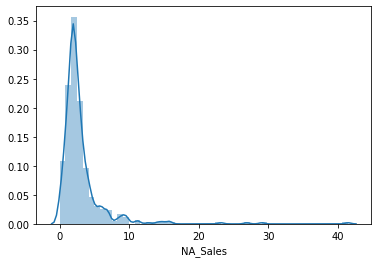

In [114]:
plt.tight_layout()
seabornInstance.distplot(videoGameSales['NA_Sales'])

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [116]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
regressor.coef_

array([ 0.0721695 , -0.07925158,  0.08531483,  0.02687367])

In [118]:
y_pred = regressor.predict(x_test)

In [119]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
90,2.90,3.132549
254,3.03,3.844732
283,0.71,3.179338
445,1.69,3.453784
461,1.94,3.156599
15,14.97,2.985303
316,0.87,2.122093
489,1.83,3.564317
159,2.70,2.647069
153,3.13,2.229508


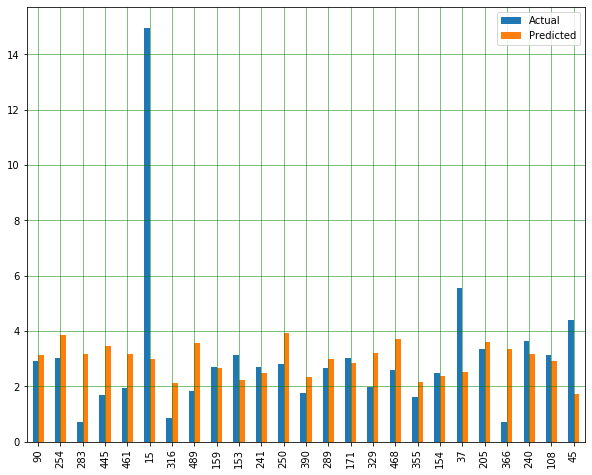

In [120]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [121]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.7914482693154727
Mean Squared Error: 11.15084003342442
Root Mean Squared Error: 3.33928735412579


In [122]:
x = videoGameSales[['Platform', 'Year', 'Genre', 'Publisher']]
y = videoGameSales['EU_Sales']

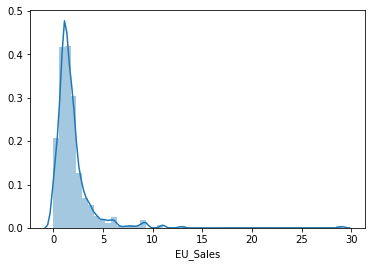

In [123]:
plt.tight_layout()
seabornInstance.distplot(videoGameSales['EU_Sales'])

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [125]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
regressor.coef_

array([-0.00064696,  0.04322144,  0.08094252,  0.0144049 ])

In [127]:
y_pred = regressor.predict(x_test)

In [128]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
90,2.83,1.710589
254,0.91,1.348005
283,2.48,2.291483
445,0.87,2.379328
461,0.80,1.823260
15,4.94,2.008482
316,1.57,1.917979
489,0.80,2.202588
159,1.91,2.043236
153,1.94,2.101124


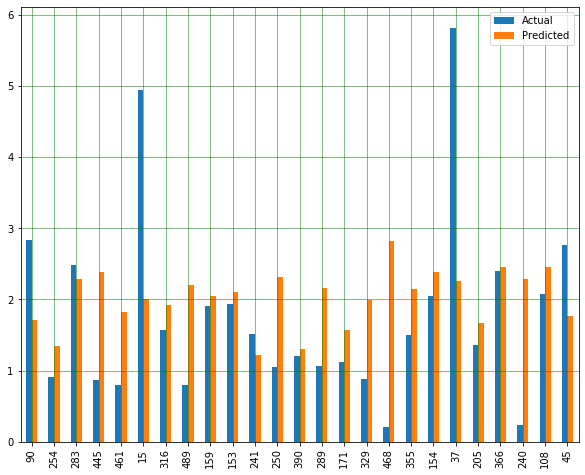

In [129]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [130]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0531989608990542
Mean Squared Error: 2.31824743965638
Root Mean Squared Error: 1.522579206365429


In [131]:
x = videoGameSales[['Platform', 'Year', 'Genre', 'Publisher']]
y = videoGameSales['JP_Sales']

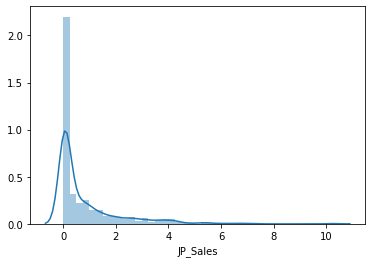

In [132]:
plt.tight_layout()
seabornInstance.distplot(videoGameSales['JP_Sales'])

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [134]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
regressor.coef_

array([-0.09135827, -0.01410384,  0.06310695,  0.02442463])

In [136]:
y_pred = regressor.predict(x_test)

In [137]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
90,0.24,0.538723
254,0.26,1.572923
283,0.03,0.965696
445,0.14,1.159406
461,0.02,0.106554
15,0.24,0.023421
316,1.05,1.576314
489,0.03,0.318160
159,0.11,0.758940
153,0.07,1.529416


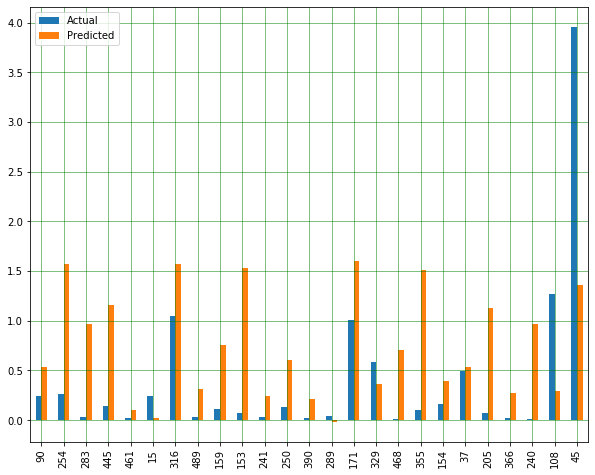

In [138]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [139]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7848633080467026
Mean Squared Error: 1.3449082182633385
Root Mean Squared Error: 1.1597017798828018


In [140]:
x = videoGameSales[['Platform', 'Year', 'Genre', 'Publisher']]
y = videoGameSales['Global_Sales']

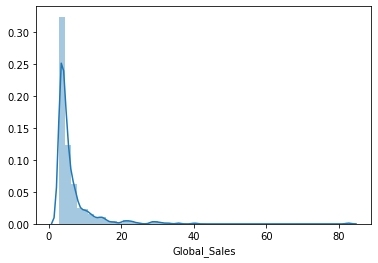

In [141]:
plt.tight_layout()
seabornInstance.distplot(videoGameSales['Global_Sales'])

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [143]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
regressor.coef_

array([-0.01228974, -0.02851964,  0.2366361 ,  0.07414912])

In [145]:
y_pred = regressor.predict(x_test)

In [146]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
90,7.72,6.063202
254,4.34,7.062445
283,4.11,7.029080
445,3.12,7.761344
461,3.03,5.854335
15,21.82,5.765713
316,3.84,6.196206
489,2.93,6.797817
159,5.53,6.287410
153,5.72,6.309858


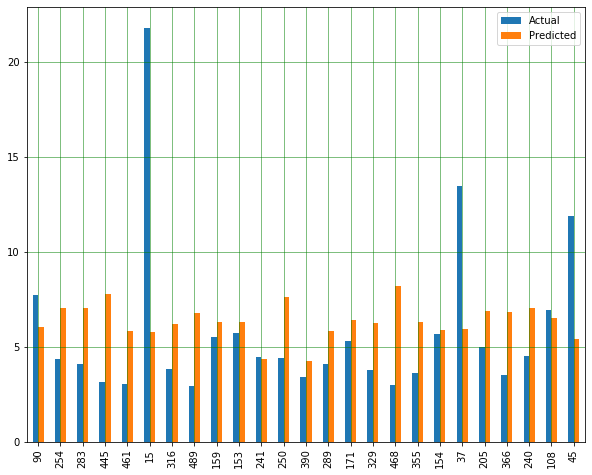

In [147]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [149]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.323344565296016
Mean Squared Error: 28.132262785138984
Root Mean Squared Error: 5.303985556648791


In [150]:
x = videoGameSales[['Platform', 'Year', 'Genre', 'Publisher']]
y = videoGameSales['Other_Sales']

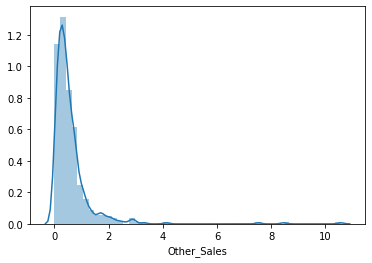

In [151]:
plt.tight_layout()
seabornInstance.distplot(videoGameSales['Other_Sales'])

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [153]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
regressor.coef_

array([0.00749997, 0.02163299, 0.00729999, 0.00844131])

In [155]:
y_pred = regressor.predict(x_test)

In [156]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
90,1.75,0.680957
254,0.13,0.296648
283,0.89,0.592706
445,0.42,0.768765
461,0.27,0.767415
15,1.67,0.748168
316,0.35,0.580152
489,0.27,0.712469
159,0.80,0.837962
153,0.58,0.450375


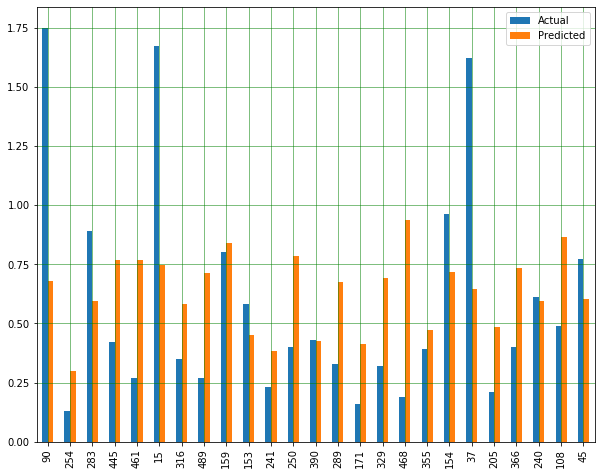

In [157]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [158]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3508572486668476
Mean Squared Error: 0.27191683085556373
Root Mean Squared Error: 0.521456451542757
